In [2]:
import pandas as pd
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import curvefit
from curvefit.pipelines.basic_model import BasicModel
from curvefit.core import functions

In [4]:
dataset = pd.read_csv('dataset_for_CurveFit.csv')
dataset = dataset.reset_index(drop=True)
dataset = dataset.sort_values(by=["DateI"])
dataset["SE"] = np.random.normal(scale=0.1, size=dataset.shape[0])
print(dataset)

      Unnamed: 0        Date                        State    Deaths  \
0              0  2020-01-30  Andaman and Nicobar Islands  0.000000   
128            0  2020-01-30                        Assam  0.000000   
1792           0  2020-01-30                  Uttarakhand  0.000000   
192            0  2020-01-30                        Bihar  0.000000   
1728           0  2020-01-30                Uttar Pradesh  0.000000   
...          ...         ...                          ...       ...   
1599          63  2020-04-02                    Rajasthan  0.000000   
1663          63  2020-04-02                   Tamil Nadu  0.013861   
1727          63  2020-04-02                    Telengana  0.085705   
895           63  2020-04-02                    Jharkhand  0.000000   
1919          63  2020-04-02                  West Bengal  0.032867   

      Confirmed  StatePopulation  DaysCovariate  DateI        SE  
0      0.000000           380581          0.000      0  0.114519  
128    0.0000

In [8]:
dataset = dataset[(dataset["State"] == "Kerala") | (dataset["State"] == "Delhi") | (dataset["State"] == "Hubei")]
dataset

,Unnamed: 0,Date,State,Deaths,Confirmed,StatePopulation,DaysCovariate,DateI,SE
384,0,2020-01-30,Delhi,0.000000,0.000000,16787941,0.000,0,-0.008379
704,0,2020-01-31,Hubei,3.487179,99.247863,58500000,3.006,0,-0.055590
960,0,2020-01-30,Kerala,0.000000,0.029935,33406061,0.000,0,0.019039
385,1,2020-01-31,Delhi,0.000000,0.000000,16787941,0.000,1,-0.093343
705,1,2020-02-01,Hubei,4.256410,122.273504,58500000,3.340,1,-0.083761
...,...,...,...,...,...,...,...,...,...
766,62,2020-04-02,Hubei,54.683761,1159.008547,58500000,23.714,62,0.104556
446,62,2020-04-01,Delhi,0.119133,9.054118,16787941,9.672,62,-0.099844
447,63,2020-04-02,Delhi,0.238266,13.045078,16787941,10.006,63,0.053825
767,63,2020-04-03,Hubei,54.752137,1159.008547,58500000,24.048,63,0.171325


,Unnamed: 0,Date,State,Deaths,Confirmed,StatePopulation,DaysCovariate,DateI,SE
384,0,2020-01-30,Delhi,0.000000,0.000000,16787941,0.000,0,-0.008379
704,0,2020-01-31,Hubei,3.487179,99.247863,58500000,3.006,0,-0.055590
960,0,2020-01-30,Kerala,0.000000,0.029935,33406061,0.000,0,0.019039
385,1,2020-01-31,Delhi,0.000000,0.000000,16787941,0.000,1,-0.093343
705,1,2020-02-01,Hubei,4.256410,122.273504,58500000,3.340,1,-0.083761
...,...,...,...,...,...,...,...,...,...
766,62,2020-04-02,Hubei,54.683761,1159.008547,58500000,23.714,62,0.104556
446,62,2020-04-01,Delhi,0.119133,9.054118,16787941,9.672,62,-0.099844
447,63,2020-04-02,Delhi,0.238266,13.045078,16787941,10.006,63,0.053825
767,63,2020-04-03,Hubei,54.752137,1159.008547,58500000,24.048,63,0.171325


In [21]:
def generalized_error_function(t, params) :
    alpha = params[0]
    beta  = params[1]
    p     = params[2]
    return 0.5 * p * ( 1.0 + scipy.special.erf( alpha * ( t - beta ) ) )

# link function used for beta
def identity_fun(x) :
    return x
#
# link function used for alpha, p
def exp_fun(x) :
    return np.exp(x)
#
# inverse of function used for alpha, p
def log_fun(x) :
    return np.log(x)

def return_se_as_f_of_t(t):
    return np.random.normal(scale=0.1)

In [40]:
model = BasicModel(
    all_data=dataset, 
    col_t="DateI", 
    col_obs="Confirmed", 
    col_group="State",
    col_obs_compare="Confirmed", 
    all_cov_names=["DaysCovariate", "DaysCovariate", "DaysCovariate"], 
    fun=functions.log_erf, 
    predict_space=functions.log_erf, 
    fit_dict={'fe_init': [1, 60, 0.05], options:'disp':True},  
    basic_model_dict={'col_obs_se': "SE", 
                    'col_covs': [["DaysCovariate"], ["DaysCovariate"], ["DaysCovariate"]], 
                    'param_names': ['alphalink', 'betalink', 'gammalink'], 
                    'link_fun': [exp_fun, identity_fun, exp_fun], 
                    'var_link_fun': [exp_fun, identity_fun, exp_fun]}, 
    obs_se_func=return_se_as_f_of_t)

In [41]:
print("Model pipeline setting up...")
model.setup_pipeline()

Model pipeline setting up...


In [43]:
print("Model setup. Running fit...")
model.fit(dataset)

Model setup. Running fit...


TypeError: fit_params() got an unexpected keyword argument 'disp'

In [33]:
model.run(n_draws=180, prediction_times=np.linspace(0, 180, num=180), cv_threshold=0.001, smoothed_radius=[4,4], num_smooths=3, exclude_groups=["Hubei"], exclude_below=20)

Running PV for Delhi


/home/ayush/Projects/ml_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/home/ayush/Projects/ml_env/lib/python3.6/site-packages/curvefit-0.0.0-py3.6.egg/curvefit/core/model.py:181: RuntimeWarning: invalid value encountered in multiply
  for i, cov in enumerate(covs)
/home/ayush/Projects/ml_env/lib/python3.6/site-packages/curvefit-0.0.0-py3.6.egg/curvefit/core/functions.py:43: RuntimeWarning: invalid value encountered in multiply
  return 0.5*params[2]*(special.erf(params[0]*(t - params[1])) + 1.0)


Running PV for Hubeid time 63
Running PV for Kerala time 63


In [36]:
predictions_Kerala = np.exp(model.mean_predictions["Kerala"])
predictions_Maharashtra = np.exp(model.mean_predictions["Delhi"])
print(predictions_Kerala)
print(predictions_Maharashtra)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

AttributeError: 'BasicModel' object has no attribute 'plot_draws'

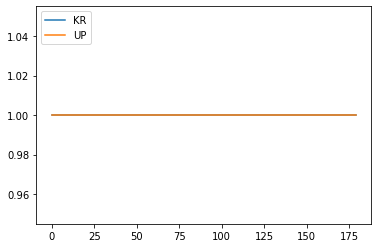

In [37]:
plt.plot(np.exp(predictions_Kerala), label="KR")
plt.plot(np.exp(predictions_Maharashtra), label="UP")
plt.legend(loc="upper left")
plt.show()